In [8]:
import pandas as pd
import os

### Merging 12 months of sales data into a single file

In [16]:
import os
import pandas as pd

# List all files in the directory
files = [file for file in os.listdir("C:\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")]
all_months_data = pd.DataFrame()

# Read each file and concatenate
for file in files:
    df = pd.read_csv("C:\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])

# Save concatenated data to all_data.csv in the desired directory
all_months_data.to_csv("C:\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\all_data.csv", index=False)


In [18]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Augment data with additional columns


### Task 2: ADD Month Column


In [36]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]  # Extracting the first two characters
all_months_data['Month'] = all_months_data['Month'].astype('int32')  # Converting to integer
all_months_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Clean up the data


DROP rows of NAN

In [21]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna (how= 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [33]:
all_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']

In [35]:
# Remove rows with non-numeric values in the 'Month' column
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

# Use pd.to_numeric to convert to integers and coerce errors to NaN
all_months_data['Month'] = pd.to_numeric(all_months_data['Month'], errors='coerce')

# Drop any rows where 'Month' is NaN (non-numeric values)
all_months_data.dropna(subset=['Month'], inplace=True)

# Convert 'Month' to int32
all_months_data['Month'] = all_months_data['Month'].astype('int32')

# Display the first few rows
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Convert columns to the correct type

In [42]:
# Convert 'Quantity Ordered' to numeric, coercing errors to NaN
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# Convert 'Price Each' to numeric, coercing errors to NaN
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Now you can safely calculate 'Sales'
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Display the first few rows to confirm changes
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [40]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')  # Make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Task 3: Add a sales column

In [43]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']  # Corrected to use square brackets for accessing columns
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### TASK 4: ADD a city coulomn


In [63]:
# Task: Add a city column
# Let's use apply()
def get_city(address):
    return address.split(', ')[1]  # Get the city from the address

def get_state(address):
    return address.split(', ')[2].split(' ')[0]  # Get the state abbreviation from the address

# Create the 'City' column using apply
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Display the first few rows of the DataFrame
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


### What was the best month for sale? How much was earned that month?


In [48]:
# Group by Month and sum the relevant columns
monthly_summary = all_data.groupby('Month').agg(
    Quantity_Ordered=('Quantity Ordered', 'sum'),
    Price_Each=('Price Each', 'mean'),  # Using mean for Price Each as an example
    Sales=('Sales', 'sum')
).reset_index()

# Display the resulting DataFrame
monthly_summary


,Month,Quantity_Ordered,Price_Each,Sales
0,01,10903,186.607105,1822256.73
1,02,13449,182.787868,2202022.42
2,03,17005,184.201665,2807100.38
3,04,20558,184.237158,3390670.24
4,05,18667,189.250581,3152606.75
5,06,15253,189.023580,2577802.26
6,07,16072,184.183835,2647775.76
7,08,13448,186.468140,2244467.88
8,09,13109,179.415893,2097560.13
9,10,22703,183.194696,3736726.88


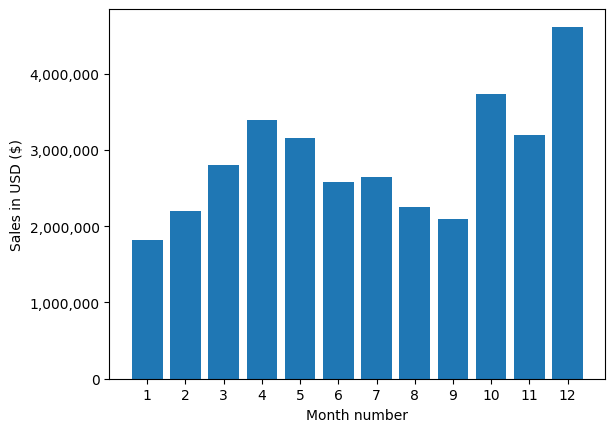

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Group the data by 'Month' and sum the sales
results = all_data.groupby('Month').sum()  # Ensure this is defined correctly

# Function to format y-axis ticks
def currency_formatter(x, _):
    return f'{int(x):,}'  # Format the number with commas

months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()


### Question 2:. What city had the highest number of sales?


In [105]:
# Group the data by 'City' and sum the sales along with other relevant columns
results = all_data.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum',
    'Month': 'count'  # Count the number of entries (or orders) for each city
}).reset_index()

# Display the results as a table
results


,City,Quantity Ordered,Price Each,Sales,Month
0,Atlanta (GA),16602,2779908.20,2795498.58,14881
1,Austin (TX),11153,1809873.61,1819581.75,9905
2,Boston (MA),22528,3637409.77,3661642.01,19934
3,Dallas (TX),16730,2752627.82,2767975.40,14820
4,Los Angeles (CA),33289,5421435.23,5452570.80,29605
5,New York City (NY),27932,4635370.83,4664317.43,24876
6,Portland (ME),2750,447189.25,449758.27,2455
7,Portland (OR),11303,1860558.22,1870732.34,10010
8,San Francisco (CA),50239,8211461.74,8262203.91,44732
9,Seattle (WA),16553,2733296.01,2747755.48,14732


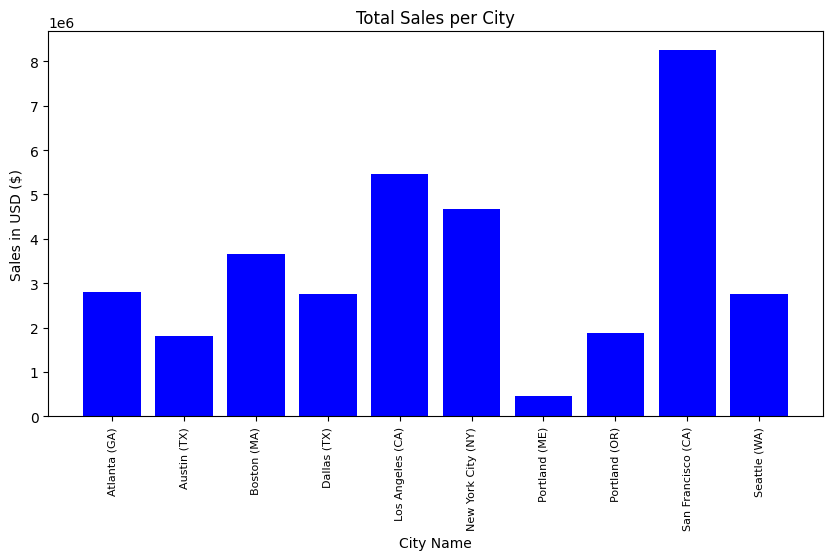

In [115]:
import matplotlib.pyplot as plt

# Get the city names and sales data
cities = [city for city in results['City']]
sales = results['Sales']

# Create a bar plot
plt.figure(figsize=(10, 5))  # Optional: Set figure size
plt.bar(cities, sales, color='blue')  # You can change the color if desired
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.title('Total Sales per City')  # Optional: Add a title to the plot
plt.show()


### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [123]:
# Ensure 'Order Date' is in datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Extract the hour and minute from 'Order Date'
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

# Select relevant columns for display
table_data = all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute']]

# Display the formatted table
table_data.head()  # Adjust 'head()' to show more rows if needed


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


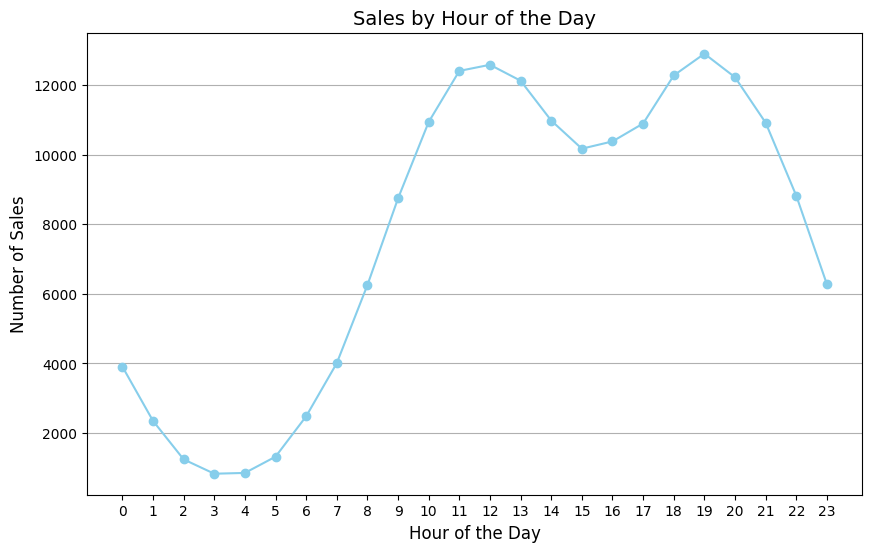

In [124]:
import matplotlib.pyplot as plt

# Group the data by hour and count the number of sales
hourly_sales = all_data.groupby('Hour').count()['Quantity Ordered']

# Convert the results to a DataFrame for better visualization
hourly_sales_df = hourly_sales.reset_index()
hourly_sales_df.columns = ['Hour', 'Number of Sales']

# Create a freehand line plot to visualize the number of sales by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales_df['Hour'], hourly_sales_df['Number of Sales'], marker='o', linestyle='-', color='skyblue')
plt.xticks(hourly_sales_df['Hour'], rotation='horizontal', size=10)
plt.ylabel('Number of Sales', size=12)
plt.xlabel('Hour of the Day', size=12)
plt.title('Sales by Hour of the Day', size=14)
plt.grid(axis='y')
plt.show()


### Question 4: What Products are most often sold together?

In [129]:
# Filter for duplicated Order IDs to find products sold together
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Group products by Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicates to keep unique Order ID and grouped product pairs
df = df[['Order ID', 'Grouped']].drop_duplicates()

# Display the first 100 entries of the table
df.head(100)


C:\Users\shafi\AppData\Local\Temp\ipykernel_7472\678642280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable, AAA Batteries (4-pack)"
2683,179128,"iPhone, Apple Airpods Headphones"
2718,179162,"Google Phone, USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor, Macbook Pro Laptop"


In [130]:
# Referenced: https://stackoverflow.com/questions/521958
from itertools import combinations
from collections import Counter

# Initialize the counter
count = Counter()

# Iterate over the 'Grouped' column in the DataFrame
for row in df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# Print the 10 most common product combinations
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most and why do you think it sold the most?

In [134]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
dtype: object


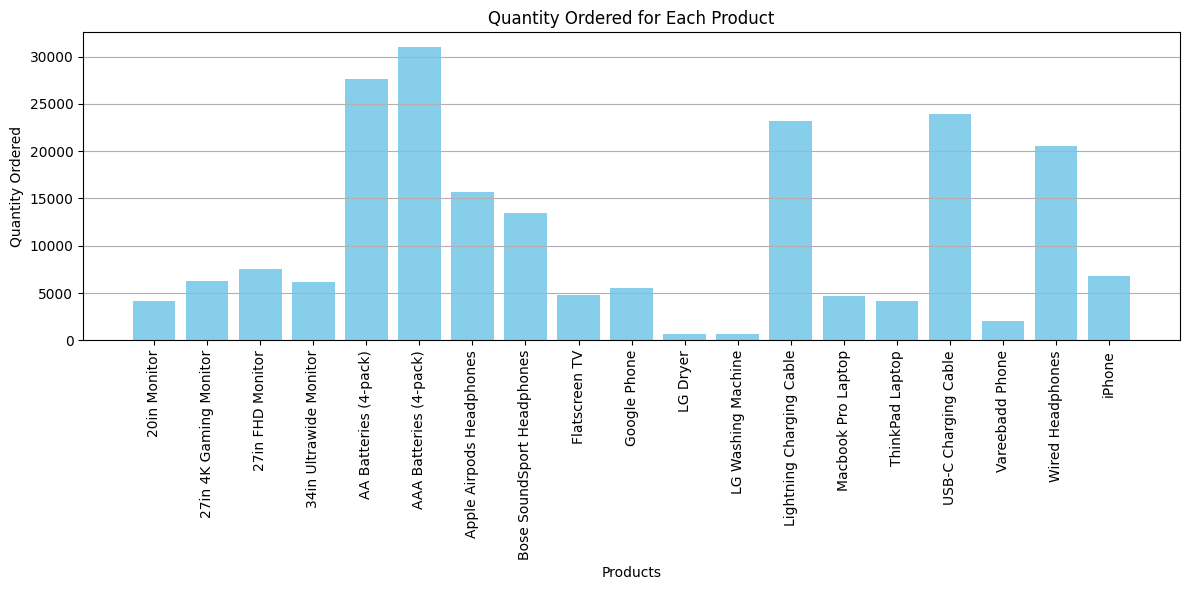

Summary of the Most Sold Product:
                  Product  Quantity Sold
0  AAA Batteries (4-pack)          31017


In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming all_data is your DataFrame already loaded with the data
# If not, load your data into a DataFrame first
# all_data = pd.read_csv('your_file.csv')  # Example for loading data

# Check the data types of the columns
print(all_data.dtypes)

# Ensure 'Quantity Ordered' is numeric, coercing errors to NaN
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# Optionally drop rows with NaN values in 'Quantity Ordered'
all_data = all_data.dropna(subset=['Quantity Ordered'])

# Group the data by product and sum the quantity ordered
product_group = all_data.groupby('Product').agg({'Quantity Ordered': 'sum'})

# Find the product with the maximum quantity sold
most_sold_product = product_group['Quantity Ordered'].idxmax()  # Product with the highest sales
most_sold_quantity = product_group['Quantity Ordered'].max()    # Quantity sold of that product

# Prepare data for plotting
products = product_group.index
quantity_ordered = product_group['Quantity Ordered'].values

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(products, quantity_ordered, color='skyblue')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(rotation='vertical', size=10)
plt.title('Quantity Ordered for Each Product')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Create a summary table for the most sold product
summary_data = pd.DataFrame({
    'Product': [most_sold_product],
    'Quantity Sold': [most_sold_quantity]
})

print("Summary of the Most Sold Product:")
print(summary_data)


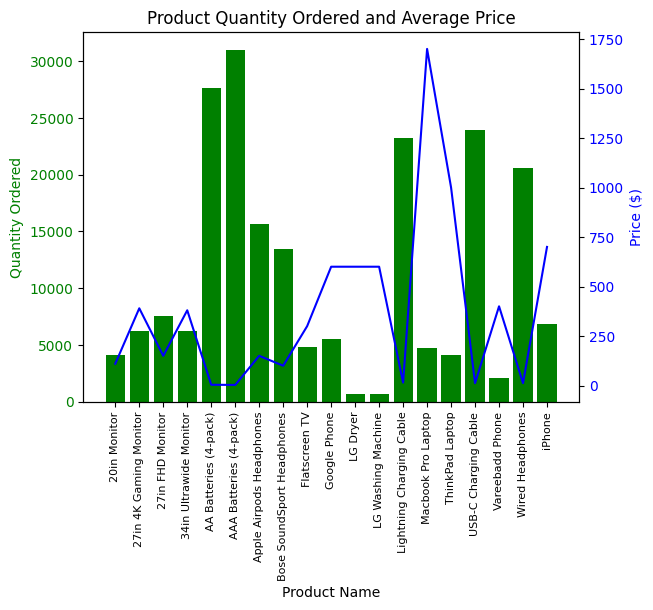

In [141]:
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame and you've already calculated 'quantity_ordered' and 'products'
# First, group by 'Product' and calculate the mean price
prices = all_data.groupby("Product")['Price Each'].mean()

# Create a bar and line graph
fig, ax1 = plt.subplots()

# Bar graph for quantity ordered
ax1.bar(products, quantity_ordered, color='g', label='Quantity Ordered')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Set the x-ticks and labels
ax1.set_xticks(range(len(products)))  # Set tick positions to match products
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Create a second y-axis for the price
ax2 = ax1.twinx()
ax2.plot(products, prices, 'b-', label='Average Price')
ax2.set_ylabel('Price ($)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Show the plot
plt.title('Product Quantity Ordered and Average Price')
plt.show()
